# Import packages and functions

In [1]:
%matplotlib inline
%run utils.py

In [2]:
FILE_PATH_SHORT = 'input/short_simulation.mat'
FILE_PATH_LONG = 'input/long_simulation.mat'

# Convert Matlab file into Pandas Data frame

In [3]:
# read Matlab file and convert into DataFrame Simulation parameters i.e. independent variables
simulation = read_and_save_simulation(FILE_PATH_LONG)

['__header__', '__version__', '__globals__', 'Simulation']
Matlab file is converted to DataFrame
Independent variables have been read :  (5000000, 7)
Simulation Result is read


In [4]:
# dimension of the data set
simulation.shape

(20000000, 10)

## Random sampling without replacement

In [5]:
# random sampling
simulation = simulation.sample(frac=0.025)

# remove `id` column
del simulation['id']

# reset index
simulation.reset_index(drop=True, inplace=True)

In [6]:
# dimension of the simulated data set
print('Dimension of the simulation : ', simulation.shape)
simulation.head()

Dimension of the simulation :  (500000, 9)


,len,distance_source,con,snr,depth_1,depth_2,localization_source,connectivity_estimate,y
0,1997.0,51.183372,1.0,0.542675,42.447932,67.666776,0.0,1.0,1.0
1,637.0,105.679424,0.0,0.860025,44.435880,75.712469,0.0,0.0,0.5
2,1359.0,99.951416,1.0,0.507677,61.374897,69.523009,1.0,1.0,1.0
3,1280.0,39.441056,1.0,0.686373,58.161995,39.812124,1.0,1.0,1.0
4,1562.0,86.979179,0.0,0.880902,91.511737,58.710876,0.0,1.0,1.0


In [7]:
# descriptive statistics
simulation.describe().T

,count,mean,std,min,25%,50%,75%,max
len,500000.0,1100.536210,519.441198,200.000000,651.000000,1101.000000,1550.000000,2000.000000
distance_source,500000.0,83.465377,31.967614,1.064023,59.906596,83.076973,106.783204,181.341739
con,500000.0,0.500008,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000
snr,500000.0,0.749653,0.144344,0.500001,0.624505,0.749459,0.874512,0.999997
depth_1,500000.0,64.080203,20.569524,5.967457,50.910885,65.929412,79.202867,107.013056
depth_2,500000.0,64.072313,20.575877,5.967457,50.910885,65.919021,79.202867,107.013056
localization_source,500000.0,0.501102,0.499999,0.000000,0.000000,1.000000,1.000000,1.000000
connectivity_estimate,500000.0,0.500918,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000
y,500000.0,0.410280,0.472366,0.000000,0.000000,0.000000,1.000000,1.000000


In [8]:
# missing values per columns
simulation.isnull().sum()

len                      0
distance_source          0
con                      0
snr                      0
depth_1                  0
depth_2                  0
localization_source      0
connectivity_estimate    0
y                        0
dtype: int64

In [9]:
# data types per column
simulation.get_dtype_counts()

float64    9
dtype: int64

## Target variable

In [10]:
# target variable
simulation.y.value_counts(normalize=True) * 100

0.0    55.2078
1.0    37.2638
0.5     7.5284
Name: y, dtype: float64

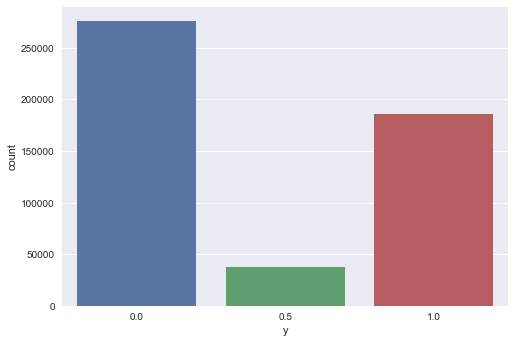

In [11]:
# bar plot of target variable
sns.countplot(simulation.y)

In [12]:
# `con` variable
simulation.con.value_counts(normalize=True) * 100

1.0    50.0008
0.0    49.9992
Name: con, dtype: float64

# Visualization

In [27]:
# name of the columns
simulation.columns

Index(['len', 'distance_source', 'con', 'snr', 'depth_1', 'depth_2',
       'localization_source', 'connectivity_estimate', 'y'],
      dtype='object')

#### Localization source & Signal Noise Ratio by FPR

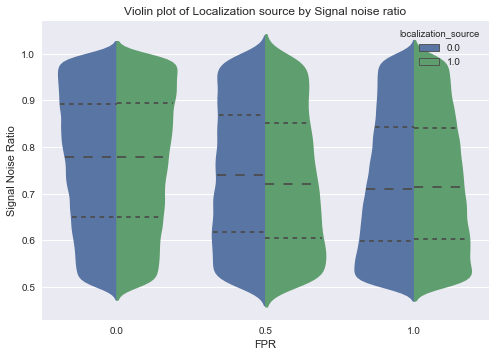

In [40]:
sns.violinplot(x="y", y="snr", hue="localization_source",
               data=simulation, split=True, inner="quart")
sns.despine(left=True)
plt.title('Violin plot of Localization source by Signal noise ratio')
plt.xlabel('FPR')
plt.ylabel('Signal Noise Ratio')
plt.savefig('figures/violin_localization_by_snr.png')

#### Distance source & Connectivity by FPR

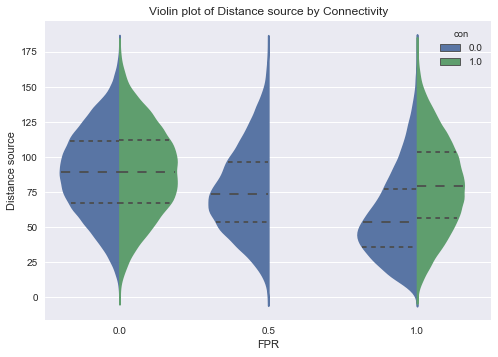

In [42]:
sns.violinplot(x="y", y="distance_source", hue="con",
               data=simulation, split=True, inner="quart")
sns.despine(left=True)
plt.title('Violin plot of Distance source by Connectivity')
plt.xlabel('FPR')
plt.ylabel('Distance source')
plt.savefig('figures/violin_distance_by_con.png')

### Pairwise Correlation Matrix of features

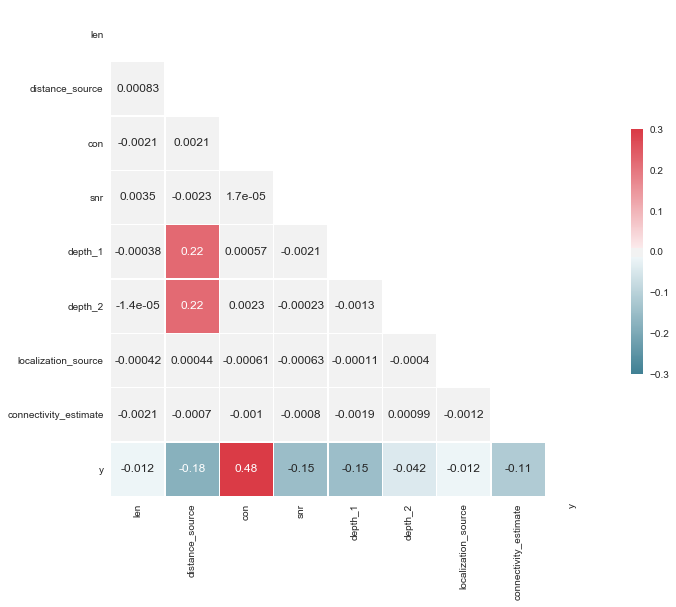

In [7]:
# set seaborn style
sns.set(style="white")

# Compute the correlation matrix
corr = simulation.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('figures/corr_heat_map.png')
plt.show()

## Paired Density and Scatterplot Matrix

Generate Paired Density nd Scatter plot of features on randomly sampled without replacement.

C:\Users\Toghrul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


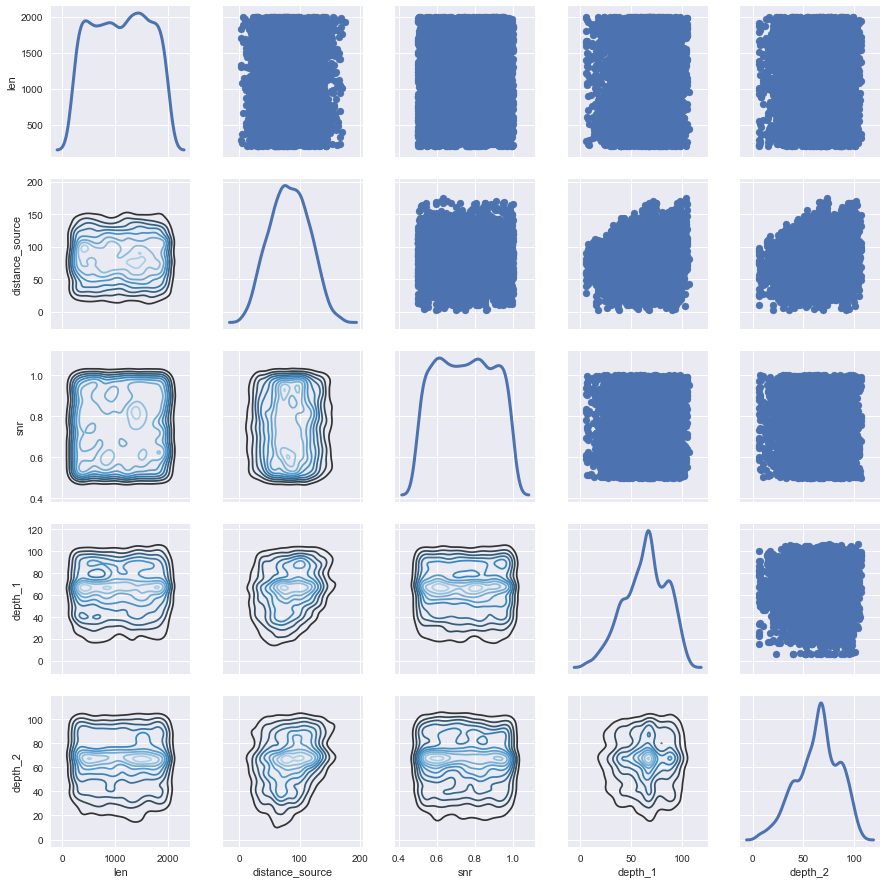

In [20]:
df_part = simulation.sample(frac=0.01).loc[:, ['len', 'distance_source', 'snr', 'depth_1', 'depth_2']]
g = sns.PairGrid(df_part, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.savefig('../figures/density_scatter_matrix.png')